<a href="https://colab.research.google.com/github/injoon-pij/pytorch-learning/blob/master/pytorch_softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) One-hot encoding 

대부분의 다중 클래스 분류 문제가 각 클래스 간의 관계가 균등하다는 점에서 one-hot encoding 벡터는 정수 encoding 벡터보다 이러한 점을 표현할 수 있는 적절한 표현 방법이다.
* 예를 들어 세 개의 카테고리에 대해서 one-hot encoding을 통해 레이블을 인코딩했을 때, 각 클래스 간의 제곱 오차가 균등하다.

 * $((1,0,0)-(0,1,0))^{2} = (1-0)^{2} + (0-1)^{2} + (0-0)^{2} = 2$

 * $((1,0,0)-(0,0,1))^{2} = (1-0)^{2} + (0-0)^{2} + (0-1)^{2} = 2$

# 2) Softmax Regression 이해하기

다중 클래스 분류(Multi-Class Classification)를 풀기 위한 대표적인 알고리즘
* 활성화함수 : softmax function
 * $softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}$
* 손실함수 : cross entropy
 * $cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$
   * 이 때 $y_{j}^{(i)}$는 one-hot vector

## 2.1 Softmax Function

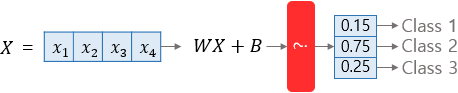

$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}$

분류하고자 하는 클래스가 k개일 때, k차원의 벡터를 입력받아서 모든 벡터 원소의 값을 0과 1사이의 값으로 값을 변경하여 다시 k차원의 벡터를 리턴

## 2.2 Cost Function

이진 분류에 관련된 logistic regression에서 쓰인 손실함수인 **Binary Cross Entropy Function**를 다중 클래스 분류로 일반화한 **Cross Entropy Function**이 손실함수로 사용됨.
* 소프트맥스 함수의 최종 손실 함수에서 $k$가 2라고 가정하면 결국 로지스틱 회귀의 비용 함수와 같음

$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)}) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}log(p^{(i)}) + (1-y^{(i)})log(1-p^{(i)})]$

# 3) Softmax Regression by pytorch

## 3.1.1 Modeling cost function (Low-level)

In [ ]:
import torch
import torch.nn.functional as F

torch.manual_seed(1)

In [ ]:
# z : 신경망의 마지막 층을 통과한 출력값 (3개의 데이터, 5개의 label)
z = torch.rand(3, 5, requires_grad=True)
print(z)
print()

# hypothesis : 출력값 z를 softmax함수에 통과시킨 값 
hypothesis = F.softmax(z, dim=1)
print(hypothesis)
print()

# y : 각 데이터들의 정답 레이블
y = torch.randint(5, (3,)).long()
print(y)
print()

# y_one_hot : y를 one-hot 벡터로 표현
y_one_hot = torch.zeros_like(hypothesis) 
y_one_hot.scatter_(1, y.unsqueeze(1), 1)
print(y_one_hot)
print()

# cost function
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor([[0.2079, 0.2861, 0.8555, 0.3366, 0.1264],
        [0.6924, 0.6601, 0.8238, 0.2413, 0.6084],
        [0.3180, 0.3877, 0.1015, 0.2721, 0.3469]], requires_grad=True)

tensor([[0.1653, 0.1787, 0.3158, 0.1880, 0.1523],
        [0.2144, 0.2075, 0.2445, 0.1365, 0.1971],
        [0.2057, 0.2205, 0.1656, 0.1965, 0.2117]], grad_fn=<SoftmaxBackward>)

tensor([0, 2, 2])

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]])

tensor(1.6689, grad_fn=<MeanBackward0>)


## 3.1.2 Modeling cost function (High-level)

앞서 구현한 cost function 코드를 좀 더 발전시켜보기


```
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
```



__1. F.softmax() + torch.log() = F.log_softmax()__

 * __torch.log(hypothesis)__ 는 출력값 z에 softmax 함수를 적용하고, 뒤이어 그 결과값에 log 함수를 적용한 것. 이 둘을 결합한 기능을 가진 __F.log_softmax()__로 대체할 수 있다.


In [ ]:
# 결과값 동일

print(torch.log(F.softmax(z, dim=1)))
print() 
print(F.log_softmax(z, dim=1))

tensor([[-1.8003, -1.7220, -1.1527, -1.6716, -1.8818],
        [-1.5401, -1.5724, -1.4086, -1.9912, -1.6241],
        [-1.5815, -1.5118, -1.7979, -1.6273, -1.5526]], grad_fn=<LogBackward>)
tensor([[-1.8003, -1.7220, -1.1527, -1.6716, -1.8818],
        [-1.5401, -1.5724, -1.4086, -1.9912, -1.6241],
        [-1.5815, -1.5118, -1.7979, -1.6273, -1.5526]],
       grad_fn=<LogSoftmaxBackward>)


__2. F.log_softmax() + F.nll_loss() = F.cross_entropy()__
* __F.nll.loss()__는 ver.1에서 __F.log_softmax()__를 수행한 후에 남은 수식들을 수행함. 그리고 이 때는 정답 데이터를 one-hot vector로 encoding한 형태가 아닌 정답 레이블 벡터 그대로 사용함.
* __F.cross_entropy()__는 __F.log_softmax()__와 __F.nll_loss()__를 포함. 즉, __F.cross_entropy()__는 내부에 손실함수뿐만 아니라 __소프트맥스 함수__도 포함.  __(모델 구현 시 혼동 주의)__

In [ ]:
# 결과값 동일

# ver.1
print((y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean())

# ver.2
print(F.nll_loss(F.log_softmax(z, dim=1), y))

# ver.3
print(F.cross_entropy(z, y))

tensor(1.6689, grad_fn=<MeanBackward0>)
tensor(1.6689, grad_fn=<NllLossBackward>)
tensor(1.6689, grad_fn=<NllLossBackward>)


## 3.2.1 Modeling Softmax Regression (Low-level)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

# data (정답 레이블 개수 3개 (0~2))
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

# data preparation
y_one_hot = torch.zeros(8, 3) # 데이터 개수 8개, 정답 레이블 개수 3개이므로
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

입력 데이터 x_train의 크기가 (8,4)이고, one-hot encoding된 정답 레이블 데이터의 크기가 (8,3)이므로 가중치 W는 (4,3)

In [ ]:
# model setting
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # forward
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) 

    # cost function
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # update
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


## 3.2.2 Modeling Softmax Regression (High-level)

dataset은 low-level 과정과 동일

In [ ]:
# model setting
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # forward (softmax 미포함 => F.cross_entropy 내부에 softmax가 포함되므로)
    z = x_train.matmul(W) + b

    # cost function (softmax 포함)
    cost = F.cross_entropy(z, y_train) # y_train을 one-hot encoding하지 않음

    # update
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


## 3.3. Softmax Regression by pytorch nn.Module

In [ ]:
# model setting => 4개의 특성을 가지고 3개의 클래스로 분류하므로 input_dim=4, output_dim=3.
model = nn.Linear(4, 3)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # forward
    prediction = model(x_train)

    # cost function
    cost = F.cross_entropy(prediction, y_train)

    # update
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.366217
Epoch  100/1000 Cost: 0.722726
Epoch  200/1000 Cost: 0.637564
Epoch  300/1000 Cost: 0.578576
Epoch  400/1000 Cost: 0.527363
Epoch  500/1000 Cost: 0.479315
Epoch  600/1000 Cost: 0.432700
Epoch  700/1000 Cost: 0.386693
Epoch  800/1000 Cost: 0.340930
Epoch  900/1000 Cost: 0.295757
Epoch 1000/1000 Cost: 0.255350


## 3.4 Modeling Softmax Regression by Class

In [ ]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3)

    def forward(self, x):
        return self.linear(x)

model = SoftmaxClassifierModel()
list(model.parameters())

[Parameter containing:
 tensor([[-0.0450,  0.0725, -0.0020,  0.4371],
         [ 0.1556, -0.1862, -0.3020, -0.0838],
         [-0.2157, -0.1602,  0.0239,  0.2981]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2718, -0.4888,  0.3100], requires_grad=True)]

## 3.5 Linear vs. Logistic vs. Softmax

* __Linear Regression__
 * 선형회귀
 * $H(x)= Wx+b$
 * $cost(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2$
 
```python
# nn.Module
model = nn.Linear(input_dim, output_dim)
prediction = model(x_train)
cost = F.mse_loss(prediction, y_train)
```

```python
# class
class LinearRegressionModel(nn.Module): 
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.linear(x)
    
model = LinearRegressionModel()
prediction = model(x_train)
cost = F.mse_loss(prediction, y_train)
```



---

* __Logistic Regression__
 * 이진분류
 * $H(x) = sigmoid(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} = σ(Wx + b)$
 * $cost(W) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]$

```python
# nn.Module
model = nn.Sequential(
       nn.Linear(input_dim, output_dim),
       nn.Sigmoid()
   )
prediction = model(x_train)
cost = F.binary_cross_entropy(prediction, y_train)
```

```python
# class
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

model = BinaryClassifier()
prediction = model(x_train)
cost = F.binary_cross_entropy(prediction, y_train)
```

---

* __Softmax Regression__
 * 다중분류
 * $H(x) = softmax(Wx + b) = softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}$
 * $cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$
   * 이 때 $y_{j}^{(i)}$(정답 데이터)는 one-hot vector

```python
# nn.Module
model = nn.Linear(input_dim, output_dim)
prediction = model(x_train)
cost = F.cross_entropy(prediction, y_train)
```

```python
# class
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

model = SoftmaxClassifierModel()
prediction = model(x_train)
cost = F.cross_entropy(prediction, y_train)
```

# 4) Classifying MNIST dataset by Softmax Regression 

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [ ]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [ ]:
# seed
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# hyperparameters
training_epochs = 15
batch_size = 100

In [ ]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로
                          train=True, # train or test
                          transform=transforms.ToTensor(),
                          download=True) # 다운로드 경로에 데이터가 없다면 새로 다운로드 실행

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size, # batch_size = 100
                         shuffle=True,
                         drop_last=True) # 마지막 batch를 버림

In [ ]:
# X_1
data_loader.dataset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
# Y_1
data_loader.dataset[0][1]

5

* drop_last를 하는 이유를 이해하기 위해서 1,000개의 데이터가 있다고 했을 때, 배치 크기가 128이라고 해봅시다. 1,000을 128로 나누면 총 7개가 나오고 나머지로 104개가 남습니다. 이때 104개를 마지막 배치로 한다고 하였을 때 128개를 충족하지 못하였으므로 104개를 그냥 버릴 수도 있습니다. 이때 마지막 배치를 버리려면 drop_last=True를 해주면 됩니다. 이는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아줍니다

In [ ]:
# model set

# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device) 

# cost function & optimizer
criterion = nn.CrossEntropyLoss().to(device) # contain Softmax function
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

* __to()__ : 연산을 어디서 수행할지를 정한다. to() 함수는 모델의 매개변수를 지정한 장치의 메모리로 보낸다. CPU를 사용할 경우에는 필요가 없지만, GPU를 사용하려면 to('cuda')를 해 줄 필요가 있다. 아무것도 지정하지 않은 경우에는 CPU 연산.

* __bias =__ : 편향을 사용할 것인지 지정. 기본값은 True.

* 앞서 배운 __torch.nn.functional.cross_entropy()__와 여기서 쓰인 __torch.nn.CrossEntropyLoss()__는 기능 동일

In [ ]:
# model train
for epoch in range(training_epochs): # training_epochs = 15
    avg_cost = 0
    total_batch = len(data_loader) # 600

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%02d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 01 cost = 0.272932380
Epoch: 02 cost = 0.271593004
Epoch: 03 cost = 0.270377278
Epoch: 04 cost = 0.269331962
Epoch: 05 cost = 0.268465757
Epoch: 06 cost = 0.267272115
Epoch: 07 cost = 0.266291946
Epoch: 08 cost = 0.265587240
Epoch: 09 cost = 0.264523178
Epoch: 10 cost = 0.263796926
Epoch: 11 cost = 0.263177514
Epoch: 12 cost = 0.262558430
Epoch: 13 cost = 0.261730760
Epoch: 14 cost = 0.261236936
Epoch: 15 cost = 0.260820210
Learning finished


Accuracy: 0.8729999661445618
Label:  8
Prediction:  8


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


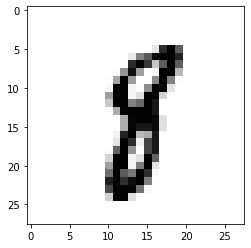

In [ ]:
# model test
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다. (메모리 절약)
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()